# Introduction

This workshop will go over tensor network computations using the Julia programming language. We will use the [ITensors.jl](https://itensors.org/) library, and pull examples from quantum computation and machine learning.

Julia is a high-level, programming language designed for high-performance scientific computing.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.add([
    "IJulia", "BenchmarkTools", "Plots", "DataFrames", "Statistics", "Random",
    "Distributions", "LinearAlgebra", "ITensors", "ITensorMPS"
])

  Activating project at `~/Documents/university/siam/julia-tensors-worshop`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/university/siam/julia-tensors-worshop/Project.toml`
  No Changes to `~/Documents/university/siam/julia-tensors-worshop/Manifest.toml`


In [6]:
# Julia lets you specify between matrix multiplcation and element-wise multiplication 
# using * and .*, respectively.

x = 3
y = 4
v = [1, 2, 3, 4]
w = rand(4)
# print(v, w)

sum = v .+ w    # element-wise addition
prod = v .* w   # element-wise multiplication

print("Sum: ", sum, "\n")
print("Product: ", prod, "\n")

Sum: [1.6244599347029407, 2.804679525045961, 3.0174264904950525, 4.669483247544441]
Product: [0.6244599347029406, 1.6093590500919221, 0.05227947148515788, 2.6779329901777658]


### Sidebar: Matrix Multiplication and the Hadamard product

 Matrix multiplication is defined as follows: given two matrices $A$ and $B$, the product $C = AB$ is given by
$$C_{ij} = \sum_k A_{ik} B_{kj}.$$
The Hadamard product (or element-wise product) of two matrices $A$ and $B$ is defined as
$$C_{ij} = A_{ij} B_{ij}.$$

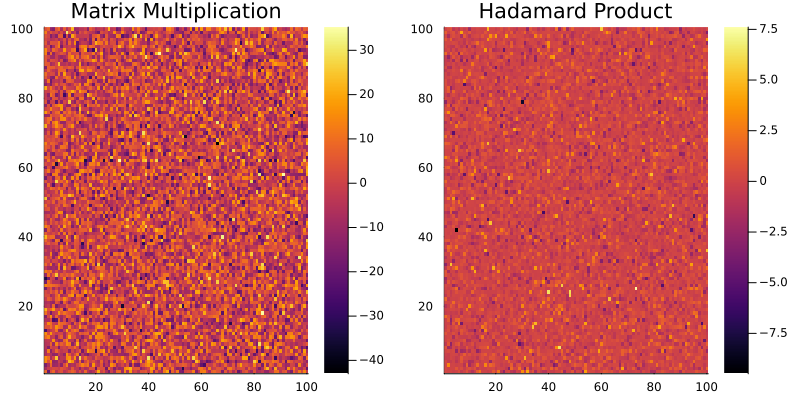

In [ ]:
# define large matrices A and B with Gaussian random entries
A = randn(100, 100)
B = randn(100, 100)

C1 = A * B      # matrix multiplication
C2 = A .* B     # element-wise multiplication

p1 = heatmap(C1, title="Matrix Multiplication")
p2 = heatmap(C2, title="Hadamard Product")
plot(p1, p2, layout=(1,2), size=(800,400))

In [ ]:
# defining functions for scalar, vector, and matrix inputs
f(x) = x^2 + 2x + 1                         # scalar function
f(v::AbstractVector) = v .^ 2 .+ 2v .+ 1    # vector function
f(A::AbstractMatrix) = A .^ 2 .+ 2A .+ 1    # matrix function